In [34]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

from pandas import Series
from sklearn.metrics import mean_squared_error
from math import sqrt


scipy: 0.19.1
numpy: 1.13.3
matplotlib: 2.1.0
pandas: 0.20.3
sklearn: 0.19.1
statsmodels: 0.8.0


In [35]:
from pandas import Series
series = Series.from_csv('champagne.csv', header=0)
split_point = len(series) - 12
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 93, Validation 12


In [41]:
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# predict
	yhat = history[-1]
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=46.000, Expected= 65
>Predicted=65.000, Expected= 69
>Predicted=69.000, Expected= 41
>Predicted=41.000, Expected= 39
>Predicted=39.000, Expected= 79
>Predicted=79.000, Expected=146
>Predicted=146.000, Expected=250
>Predicted=250.000, Expected=303
>Predicted=303.000, Expected= 43
>Predicted=43.000, Expected= 41
>Predicted=41.000, Expected= 60
>Predicted=60.000, Expected= 52
>Predicted=52.000, Expected= 76
>Predicted=76.000, Expected= 66
>Predicted=66.000, Expected= 25
>Predicted=25.000, Expected= 35
>Predicted=35.000, Expected= 86
>Predicted=86.000, Expected=144
>Predicted=144.000, Expected=284
>Predicted=284.000, Expected=394
>Predicted=394.000, Expected=  6
>Predicted=6.000, Expected=  3
>Predicted=3.000, Expected= 20
>Predicted=20.000, Expected= 33
>Predicted=33.000, Expected=  4
>Predicted=4.000, Expected= 42
>Predicted=42.000, Expected= 50
>Predicted=50.000, Expected= 38
>Predicted=38.000, Expected= 85
>Predicted=85.000, Expected=128
>Predicted=128.000, Expected=250
>Pre

In [42]:
from pandas import Series
series = Series.from_csv('dataset.csv')
print(series.describe())

count     93.000000
mean      72.548387
std       82.088038
min        0.000000
25%       21.000000
50%       44.000000
75%       79.000000
max      394.000000
dtype: float64


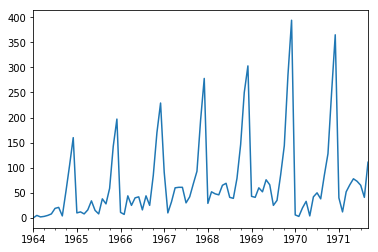

In [43]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
series.plot()
pyplot.show()

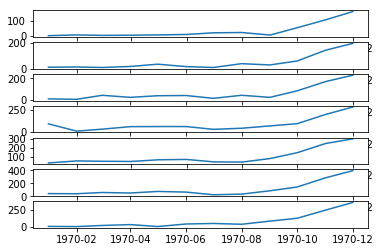

In [44]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

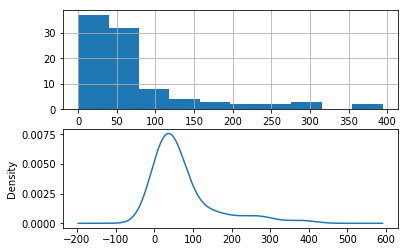

In [48]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
#pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

name:  1964 group:  [  0   5   2   3   5   8  19  21   4  53 105 160]
name:  1965 group:  [ 10  12   8  16  34  15   8  38  28  59 143 197]
name:  1966 group:  [ 11   7  44  25  40  42  16  44  25  85 170 229]
name:  1967 group:  [ 91  10  32  60  61  61  30  42  68  93 195 278]
name:  1968 group:  [ 29  52  48  46  65  69  41  39  79 146 250 303]
name:  1969 group:  [ 43  41  60  52  76  66  25  35  86 144 284 394]
name:  1970 group:  [  6   3  20  33   4  42  50  38  85 128 250 365]


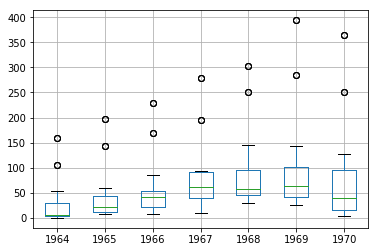

In [59]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot
series = Series.from_csv('dataset.csv')
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
for name, group in groups:
	print('name: ',name.year,'group: ',group.values)
	years[name.year] = group.values
years.boxplot()
pyplot.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF Statistic: -6.976841
p-value: 0.000000
Critical Values:
	1%: -3.515
	5%: -2.898
	10%: -2.586


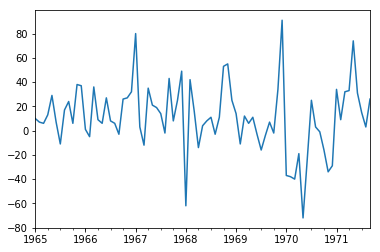

In [60]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

series = Series.from_csv('dataset.csv')
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

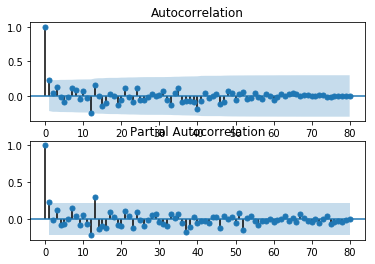

In [61]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = Series.from_csv('stationary.csv')
pyplot.figure()
pyplot.subplot(211)
plot_acf(series, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [62]:
from pandas import Series
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=186.893, Expected=195
>Predicted=245.368, Expected=278
>Predicted=110.150, Expected= 29
>Predicted=42.336, Expected= 52
>Predicted=41.822, Expected= 48
>Predicted=76.141, Expected= 46
>Predicted=84.084, Expected= 65


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


>Predicted=78.914, Expected= 69
>Predicted=46.647, Expected= 41
>Predicted=57.830, Expected= 39
>Predicted=86.351, Expected= 79
>Predicted=108.239, Expected=146
>Predicted=202.123, Expected=250
>Predicted=288.870, Expected=303
>Predicted=44.271, Expected= 43
>Predicted=68.489, Expected= 41
>Predicted=66.579, Expected= 60
>Predicted=62.043, Expected= 52
>Predicted=81.390, Expected= 76
>Predicted=84.802, Expected= 66
>Predicted=57.708, Expected= 25
>Predicted=55.550, Expected= 35
>Predicted=93.932, Expected= 86
>Predicted=160.276, Expected=144
>Predicted=264.252, Expected=284
>Predicted=316.170, Expected=394
>Predicted=59.613, Expected=  6
>Predicted=61.123, Expected=  3
>Predicted=74.940, Expected= 20
>Predicted=60.582, Expected= 33
>Predicted=81.981, Expected=  4
>Predicted=53.563, Expected= 42
>Predicted=14.544, Expected= 50
>Predicted=37.516, Expected= 38
>Predicted=85.977, Expected= 85
>Predicted=143.391, Expected=128
>Predicted=279.755, Expected=250
>Predicted=384.056, Expected=365

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


>Predicted=64.795, Expected= 65
>Predicted=49.061, Expected= 41
>Predicted=92.933, Expected=111
RMSE: 32.643


In [63]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
series = Series.from_csv('dataset.csv')
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 1) RMSE=34.171
ARIMA(0, 0, 2) RMSE=33.845
ARIMA(0, 0, 3) RMSE=33.222
ARIMA(0, 0, 4) RMSE=36.194
ARIMA(0, 1, 1) RMSE=33.500
ARIMA(0, 2, 1) RMSE=38.811
ARIMA(1, 0, 0) RMSE=32.254
ARIMA(1, 1, 0) RMSE=36.820
ARIMA(1, 1, 1) RMSE=32.643
ARIMA(1, 2, 0) RMSE=53.199
ARIMA(2, 0, 0) RMSE=32.650
ARIMA(2, 0, 1) RMSE=32.611
ARIMA(2, 1, 0) RMSE=35.881
ARIMA(2, 1, 1) RMSE=34.688
ARIMA(2, 2, 0) RMSE=46.436
ARIMA(2, 2, 1) RMSE=36.160
ARIMA(3, 0, 0) RMSE=33.417
ARIMA(3, 0, 1) RMSE=34.248
ARIMA(3, 1, 0) RMSE=35.957
ARIMA(3, 1, 1) RMSE=34.372
ARIMA(3, 2, 0) RMSE=43.697
ARIMA(3, 2, 1) RMSE=36.345
ARIMA(4, 0, 0) RMSE=33.742
ARIMA(4, 1, 0) RMSE=36.979
ARIMA(5, 0, 0) RMSE=34.930
ARIMA(5, 1, 0) RMSE=36.715
ARIMA(5, 1, 1) RMSE=35.688
ARIMA(6, 0, 0) RMSE=35.125
Best ARIMA(1, 0, 0) RMSE=32.254


               0
count  47.000000
mean    6.648345
std    33.880586
min   -77.406307
25%    -7.828667
50%     7.083416
75%    25.041764
max    98.098162


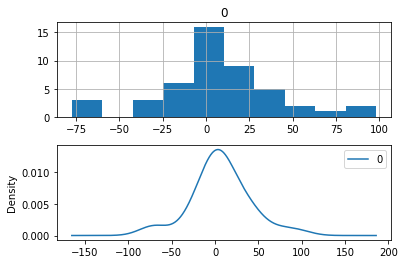

In [64]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

RMSE: 33.652
               0
count  47.000000
mean    3.000000
std    33.880586
min   -81.054652
25%   -11.477012
50%     3.435071
75%    21.393419
max    94.449817


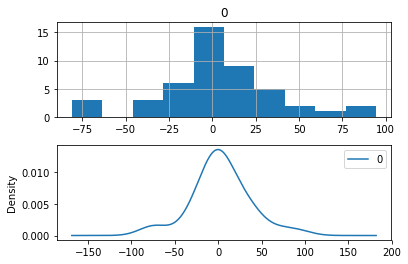

In [66]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = 3.648345
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())
pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

               0
count  47.000000
mean    6.648345
std    33.880586
min   -77.406307
25%    -7.828667
50%     7.083416
75%    25.041764
max    98.098162


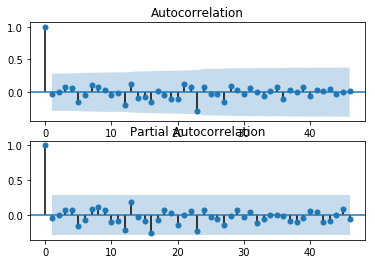

In [67]:
from pandas import Series
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# plot
pyplot.figure()
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

In [70]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# load data
series = Series.from_csv('dataset.csv')
# prepare data
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
diff = difference(X, months_in_year)
# fit model
model = ARIMA(diff, order=(0,0,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual
bias = 6.648345
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [83]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMAResults
import numpy

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = Series.from_csv('dataset.csv')
months_in_year = 12
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, months_in_year)
print('Predicted: %.3f' % yhat)

Predicted: 142.919


>Predicted=142.919, Expected=148
>Predicted=260.359, Expected=250
>Predicted=370.462, Expected=350
>Predicted=42.219, Expected= 54
>Predicted=24.489, Expected= 27
>Predicted=61.563, Expected= 63
>Predicted=75.241, Expected= 70
>Predicted=85.099, Expected= 64
>Predicted=75.007, Expected= 89
>Predicted=78.175, Expected= 53
>Predicted=41.942, Expected= 50
>Predicted=122.099, Expected=109
RMSE: 13.656


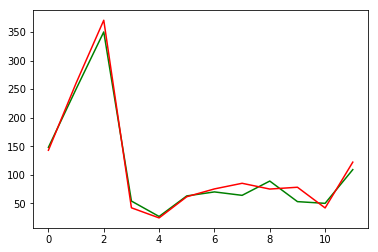

In [88]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# load and prepare datasets
dataset = Series.from_csv('dataset.csv')
X = dataset.values.astype('float32')
history = [x for x in X]
months_in_year = 12
validation = Series.from_csv('validation.csv')
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, months_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(0,0,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y,color='green')
pyplot.plot(predictions, color='red')
pyplot.show()